<a href="https://colab.research.google.com/github/kozyreviva/Data_Science/blob/main/ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

Импортируем нужные библиотеки.

In [ ]:
#импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

Скачиваем датасеты и сохраняем в переменные.

In [ ]:
#загрузка датасетов
try:
  df_train = pd.read_csv("/datasets/gold_recovery_train_new.csv")
  df_test = pd.read_csv("/datasets/gold_recovery_test_new.csv")
  df_full = pd.read_csv("/datasets/gold_recovery_full_new.csv")
except:
  df_train = pd.read_csv("gold_recovery_train_new.csv")
  df_test = pd.read_csv("gold_recovery_test_new.csv")
  df_full = pd.read_csv("gold_recovery_full_new.csv")

Посмотрим на содержание датасетов.  
Выведем 5 строк каждой таблицы.

In [ ]:
#вывод таблицы
df_train.head()

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   
3                                 -500.857308   
4                                 -499.838632   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   
2                                 11.912783   
3                                 11.999550   
4                                 11.953070   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   
2                                 -501.133383   
3                                 -501.193686   
4                                 -501.053894   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   
2                                 10.070913   
3                                  9.970366   
4                                  9.925709   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   
2                                 -500.129135   
3                                 -499.201640   
4                                 -501.686727   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   
2                                  8.013877   
3                                  7.977324   
4                                  7.894242   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   
2                                 -500.517572   
3                                 -500.255908   
4                                 -500.356035   

   secondary_cleaner.state.floatbank6_a_air  \
0    

In [ ]:
#вывод таблицы
df_test.head()

date  primary_cleaner.input.sulfate  \
0  2016-09-01 00:59:59                     210.800909   
1  2016-09-01 01:59:59                     215.392455   
2  2016-09-01 02:59:59                     215.259946   
3  2016-09-01 03:59:59                     215.336236   
4  2016-09-01 04:59:59                     199.099327   

   primary_cleaner.input.depressant  primary_cleaner.input.feed_size  \
0                         14.993118                         8.080000   
1                         14.987471                         8.080000   
2                         12.884934                         7.786667   
3                         12.006805                         7.640000   
4                         10.682530                         7.530000   

   primary_cleaner.input.xanthate  primary_cleaner.state.floatbank8_a_air  \
0                        1.005021                             1398.981301   
1                        0.990469                             1398.777912   
2                        0.996043                             1398.493666   
3                        0.863514                             1399.618111   
4                        0.805575                             1401.268123   

   primary_cleaner.state.floatbank8_a_level  \
0                               -500.225577   
1                               -500.057435   
2                               -500.868360   
3                               -498.863574   
4                               -500.808305   

   primary_cleaner.state.floatbank8_b_air  \
0                             1399.144926   
1                             1398.055362   
2                             1398.860436   
3                             1397.440120   
4                             1398.128818   

   primary_cleaner.state.floatbank8_b_level  \
0                               -499.919735   
1                               -499.778182   
2                               -499.764529   
3                               -499.211024   
4                               -499.504543   

   primary_cleaner.state.floatbank8_c_air  ...  \
0                             1400.102998  ...   
1                             1396.151033  ...   
2                             1398.075709  ...   
3                             1400.129303  ...   
4                             1402.172226  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 12.023554   
1                                 12.058140   
2                                 11.962366   
3                                 12.033091   
4                                 12.025367   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -497.795834   
1                                 -498.695773   
2                                 -498.767484   
3                                 -498.350935   
4                                 -500.786497   

   secondary_cleaner.state.floatbank4_b_air  \
0                                  8.016656   
1                                  8.130979   
2                                  8.096893   
3                                  8.074946   
4                                  8.054678   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -501.289139   
1                                 -499.634209   
2                                 -500.827423   
3                                 -499.474407   
4                                 -500.397500   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  7.946562   
1                                  7.958270   
2                                  8.071056   
3                                  7.897085   
4                                  8.107890   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -432.317850   
1                                 -525.839648   
2                                 -500.801673   
3     

In [ ]:
#вывод таблицы
df_full.head()

date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.116445             10.507046   
3                    42.689819              68.347543             10.422762   
4                    42.774141              66.927016             10.360302   

   final.output.tail_pb  final.output.tail_sol  final.output.tail_au  ...  \
0              0.895447              16.904297              2.143149  ...   
1              0.927452              16.634514              2.224930  ...   
2              0.953716              16.208849              2.257889  ...   
3              0.883763              16.532835              2.146849  ...   
4              0.792826              16.525686              2.055292  ...   

   secondary_cleaner.state.floatbank4_a_air  \
0                                 14.016835   
1                                 13.992281   
2                                 14.015015   
3                                 14.036510   
4                                 14.027298   

   secondary_cleaner.state.floatbank4_a_level  \
0                                 -502.488007   
1                                 -505.503262   
2                                 -502.520901   
3                                 -500.857308   
4                                 -499.838632   

   secondary_cleaner.state.floatbank4_b_air  \
0                                 12.099931   
1                                 11.950531   
2                                 11.912783   
3                                 11.999550   
4                                 11.953070   

   secondary_cleaner.state.floatbank4_b_level  \
0                                 -504.715942   
1                                 -501.331529   
2                                 -501.133383   
3                                 -501.193686   
4                                 -501.053894   

   secondary_cleaner.state.floatbank5_a_air  \
0                                  9.925633   
1                                 10.039245   
2                                 10.070913   
3                                  9.970366   
4                                  9.925709   

   secondary_cleaner.state.floatbank5_a_level  \
0                                 -498.310211   
1                                 -500.169983   
2                                 -500.129135   
3                                 -499.201640   
4                                 -501.686727   

   secondary_cleaner.state.floatbank5_b_air  \
0                                  8.079666   
1                                  7.984757   
2                                  8.013877   
3                                  7.977324   
4                                  7.894242   

   secondary_cleaner.state.floatbank5_b_level  \
0                                 -500.470978   
1                                 -500.582168   
2                                 -500.517572   
3                                 -500.255908   
4                                 -500.356035   

   secondary_cleaner.state.floatbank6_a_air  \
0    

Также посмотрим общую информацию по датасетам.

In [ ]:
#вывод информации
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [ ]:
#вывод информации
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [ ]:
#вывод информации
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


**Краткие выводы**  

У нас имеется 3 датасета  с данныеми процессов по очистке золота.  
Датасет df_full содержит полный комплект объектов и признаков.  
В датасете df_train содержаться все признаки но нет некоторого числа объектов.  
В датасете df_test нет некоторого числа признаков и большинства объектов.  
Все значения в столбцах типа "float" кроме столбца даты но этотм столбец не информативен для построения модели. При дальнейшей работе можно его удалить.  
В каждом датасете имеются пропуски в столбцах.Необходимо их заполнить.

У нас имеется формула расчета эффективности востановления золота.

recovery = ((C*(F-T))/(F*(C-T)))*100%

* C — доля золота в концентрате после флотации/очистки; 
* F — доля золота в сырье/концентрате до флотации/очистки;
* T — доля золота в отвальных хвостах после флотации/очистки.

Применим эту формулу и подсчитаем эффективность обогащения для признака rougher.output.recovery.  
Сохнаним в переменную.

In [ ]:
#формула эффективности востановления золота
recovery = (((df_train["rougher.output.concentrate_au"]*(df_train["rougher.input.feed_au"]-df_train["rougher.output.tail_au"]))/
            (df_train["rougher.input.feed_au"]*(df_train["rougher.output.concentrate_au"]-df_train["rougher.output.tail_au"])))*100)

Проверим значения в переменной.

In [ ]:
#вывод данных
recovery.head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
dtype: float64

Посчитаем среднюю абсолютную ошибку для сравнения на сколько наши расчеты точны по сравнению с табличными.

In [ ]:
#Вывод MAE
print("MAE:",mean_absolute_error(df_train["rougher.output.recovery"],recovery))

MAE: 9.73512347450521e-15


MAE показывает значение 10 это хороший результат. Посчитанные данные и данные представленные в таблице почти идентичные. Формула работает.

Далее проверим каких признаков из df_train не хватает в датасете df_test.

In [ ]:
#вывод признаков
[col for col in df_train.columns if col not in df_test.columns]

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Из представленных признаков видно в тестовом датафрейме нет выходных данных после каждого этапа обработки. Нет данных по выходному концентрату, остаткам и некоторым расчетным характеристикам. 

Приступим к предобработке данных.

Сперва заполним пропуски в таблицах.  
Т.к пропусков в таблицах не такое большое количество, применим fillna c методом "ffill". Применение данного метода произведем на все датафреймы. Метод "ffill" обеспечивает заполнение наиболее подходящими данными для имеющихся пропусков. 

In [ ]:
#заполнение пропусков
df_train = df_train.fillna(method = "ffill")
df_test = df_test.fillna(method = "ffill")
df_full = df_full.fillna(method = "ffill")

In [ ]:
#df_train = df_train.interpolate()
#df_test = df_test.interpolate()
#df_full = df_full.interpolate()

Проверим таблицу на наличие дубликатов.

In [ ]:
#вывод дубликатов
print(df_train.duplicated().sum())
print(df_test.duplicated().sum()) 
print(df_full.duplicated().sum()) 

0
0
0


Дубликатов нет.

**Вывод**

По этапу предобработки данных никаких критических замечаний не обнаружено. Дубликатов нет, пропуски заполнены предыдущими значениями признаков.  
Формула расчета эффективности востановления золота работает корректно. 

##Анализ данных

Посмотрим как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.  
Для большей наглядности построим гистограммы. Возьмём  3 столбца концентрата элемента после каждого этапа обработки.

Изменение концентрации золота.

In [ ]:
#построение гистограммы 
stages = ["rougher.output.concentrate_au",'primary_cleaner.output.concentrate_au','final.output.concentrate_au']
fig = px.histogram(df_train,
                   x = stages,
                   marginal = "box",
                   barmode = "overlay",
                   title = "Изменение концентрации золота",
                   opacity = 0.5)

fig.show()

In [ ]:
#построение гистограммы
stages = ["rougher.output.concentrate_ag",'primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']
fig = px.histogram(df_train,
                   x = stages,
                   marginal = "box",
                   barmode = "overlay",
                   title = "Изменение концентрации серебра",
                   opacity = 0.5)

fig.show()

Изменение концентрации свинца.

In [ ]:
#построение гистограммы
stages = ["rougher.output.concentrate_pb",'primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']
fig = px.histogram(df_train,
                   x = stages,
                   marginal = "box",
                   barmode = "overlay",
                   title = "Изменение концентрации свинца",
                   opacity = 0.5)

fig.show()

**Вывод**

На графиках видно что просходит измененио содержания всех веществ после каждого этапа обработки.

Обработка на золото послияла положительно, средний показаль металла увеличился с 20 до 44.  
На серебро обработка повлияла в обратную сторону. Концентрация металла уменьшилась с 11 до 5.  
Содержание свинца увеличилось, но рост не такой большой, с 7 до 10.  При этом промежуточная очистка не показала ярковыраженных изменений.

По итогам рассмотрения графиков можно отметить, что средне содержание золота в сырье выросло на ~100%. Серебро уменьшилось на ~50%. Свинец вырос на ~40%.



Сравним распределениe размеров гранул сырья на обучающей и тестовой выборках.
Рассмотрим распределения на 2 этапах обработки: на этапе флотации, на этапе первичной очистки.  
Построим гистограммы и выведем медианы.

Этап флотации.

In [ ]:
#построение гистограммы
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_train[df_train["rougher.input.feed_size"] < 100]["rougher.input.feed_size"], 
                           name = "train"))
fig.add_trace(go.Histogram(x=df_test[df_test["rougher.input.feed_size"] < 100]["rougher.input.feed_size"], 
                           name = "test"))

fig.update_layout(barmode = "overlay",
                  title = "Распределение гранул на выборках",
                  xaxis_title = "value",
                  yaxis_title = "count",
                  legend_title_text = "выборки")
fig.update_traces(opacity = 0.6)

fig.show()

In [ ]:
#вывод медианы
print("train_median:",df_train["rougher.input.feed_size"].median())
print("test_median:",df_test["rougher.input.feed_size"].median())

train_median: 55.269783890501536
test_median: 50.8468431600362


Этап первичной очистки.

In [ ]:
#построение гистограммы
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_train["primary_cleaner.input.feed_size"], 
                           name = "train"))
fig.add_trace(go.Histogram(x=df_test["primary_cleaner.input.feed_size"], 
                           name = "test"))

fig.update_layout(barmode = "overlay",
                  title = "Распределение гранул на выборках",
                  xaxis_title = "value",
                  yaxis_title = "count",
                  legend_title_text = "выборки")
fig.update_traces(opacity = 0.6)

fig.show()

In [ ]:
#вывод медианы
print("train_median:",df_train["primary_cleaner.input.feed_size"].median())
print("test_median:",df_test["primary_cleaner.input.feed_size"].median())

train_median: 7.289999961853027
test_median: 7.25


**Выводы**

На гистограмме этапа флотации видно небольшое смещение данных в меньшую сторону, но это не критично, т.к. видно что если объединить 2 вывборки то получится нормаольное распределение данных.

На этапе первичной очистки распределение нормальное. Значения медиан это подтверждает.



Исследуем суммарную концентрацию всех веществ на разных стадиях обработки.

Проссумируем содержание каждого вещества для каждого этапа и запишем их в переменные.

In [ ]:
#суммирование веществ на каждом этапе
feed_conc_sum = df_full[["rougher.input.feed_au",
                            "rougher.input.feed_ag",
                            "rougher.input.feed_pb",
                            "rougher.input.feed_sol"]].sum(axis=1)
rougher_conc_sum = df_full[["rougher.output.concentrate_au",
                            "rougher.output.concentrate_ag",
                            "rougher.output.concentrate_pb",
                            "rougher.output.concentrate_sol"]].sum(axis=1)
final_conc_sum = df_full[["final.output.concentrate_au",
                            "final.output.concentrate_ag",
                            "final.output.concentrate_pb",
                            "final.output.concentrate_sol"]].sum(axis=1)

Построим гистограмму для отображения содержания веществ на каждом этапе.

In [ ]:
#Построение гистограммы
fig = go.Figure()
fig.add_trace(go.Histogram(x=feed_conc_sum, 
                           name = "feed"))
fig.add_trace(go.Histogram(x=rougher_conc_sum, 
                           name = "rougher"))
fig.add_trace(go.Histogram(x=final_conc_sum, 
                           name = "final"))


fig.update_layout(barmode = "overlay",
                  title = "Суммарная концентрация веществ на этапах обработки",
                  xaxis_title = "value",
                  yaxis_title = "count",
                  legend_title_text = "этапы")
fig.update_traces(opacity = 0.6)


Посмотрим на медианные значения.

In [ ]:
#вывод медианы
print("Сырьё:",feed_conc_sum.median())
print("Черновой концентрат:",rougher_conc_sum.median())
print("Финальный концентрат:",final_conc_sum.median())

Сырьё: 57.594391040537595
Черновой концентрат: 70.18149499793637
Финальный концентрат: 69.5984444324727


Выведем дисперсию.

In [ ]:
#Вывод дисперсии
print("Сырьё:",feed_conc_sum.var())
print("Черновой концентат",rougher_conc_sum.var())
print("Финальный концентрат:",final_conc_sum.var())

Сырьё: 52.02274924317462
Черновой концентат 156.0320412454345
Финальный концентрат: 55.16829596408917


**Выводы**

Концентрация всех веществ с начала обработки до конечного результата имела видимые изменения.  
На гистограмме видно что после этапа флотации произошёл рост концентрации веществ. При этом распределение,как показывает дисперсия, в значительной степени не поменялось.  
Медиана финального концентрата и чернового концентрата наоборот почти остались без изменений, а дисперсия выросла. Это говорит о том что финальный концентат стал более "концентрированней", т.к в процессе обработки концентрация некоторых веществ увеличилась или уменьшилась. 

##Модель

У нас имеется 2 целевых признака по которым нужно найти минимальную ошибку.  
Напишем 2 функции для нахождения sMAPE.  Одна будет считать ошибку между между предсказаниями и целевым признаком. А вторая будет считать ошибку исходя из результатов.

In [ ]:
#функция sMAPE
def smape(y_true, y_pred):
    return 100 * np.mean(np.abs(y_true - y_pred) / ( 0.00001 + (np.abs(y_true) + np.abs(y_pred)) / 2) )

In [ ]:
#итоговая sMAPE
def final_smape(rougher, final):
  return (0.25 * rougher) + (0.75 * final)

Добавим все необходимые переменные.  
Добавим scorer для подсчета sMAPE при кросс-валидации.

In [ ]:
#создание скорера
my_scorer = make_scorer(smape,greater_is_better = True)

Сохраним в переменную столбцы которых нет в тестовом датафрейме.

Для того чтобы найти целевые признаки для тестового датафрейма необходимо изъять их из полного датафрейма. Для этого укажем столбец date как индекс и по нему найдём нужные значения.  

Для тестового датафрейма создадим переменную со столбцом date и определим как индекс. В полном датафрейме определим столбец date как индекс.

In [ ]:
#создание переменных
drop_features = [col for col in df_train.columns if col not in df_test.columns]
test_new_index = df_test.set_index("date").index
df_full = df_full.set_index("date")

создадим переменныех с признакими и целевми признаками. для каждого целевого признака будет свой датафрейм с признаками, это необходимо для корректного предсказания.

In [ ]:
#разделение на обучающие и целевые признаки
features_train_final = df_train.drop(["date"]+drop_features,axis= 1)
features_train_rougher = features_train_final.drop([col for col in features_train_final.columns if "rougher" not in col],axis = 1)
target_train_r_rec = df_train["rougher.output.recovery"]
target_train_f_rec = df_train["final.output.recovery"]

features_test_rougher = df_test.drop([col for col in df_test.columns if "rougher" not in col],axis = 1)
features_test_final = df_test.drop("date",axis = 1)
target_test_r_rec = df_full.loc[test_new_index,:]["rougher.output.recovery"]
target_test_f_rec = df_full.loc[test_new_index,:]["final.output.recovery"]

Признаки определены.

Далее проверим в каждом датафрейме столбцы с высокой корреляцией.
Для наглаядности возьмём один из датафреймов и проверим на зависимость признаков.

Покажем зависимость на тепловой карте.

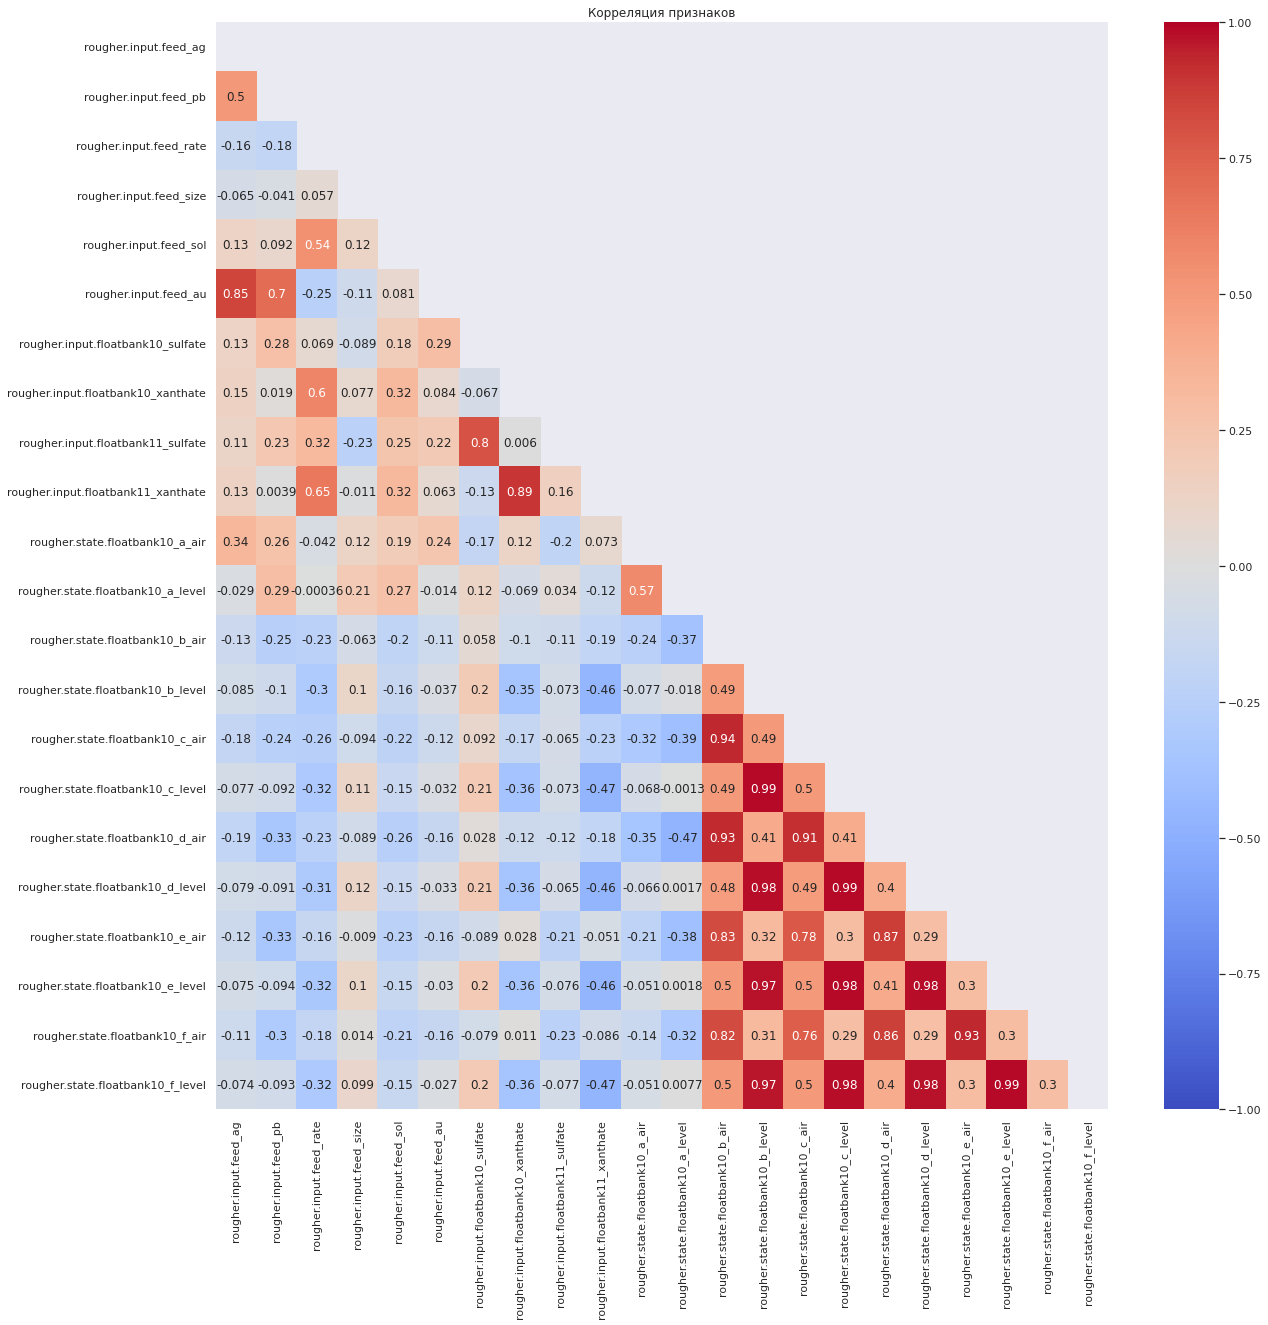

In [ ]:
#выделим значения для сокрытия их в тепловой карте
upp_mat = np.triu(features_train_rougher.corr())

#построение тепловой карты корреляции признаков
sns.heatmap(features_train_rougher.corr(),vmin = -1, vmax = +1, annot = True, cmap = 'coolwarm', mask = upp_mat)
sns.set(rc = {'figure.figsize':(20,20)})
plt.title("Корреляция признаков")
plt.show()

Корреляция между признаками присутствует. Для избежания мультиколлинеарности удалим признаки с зависимостью. 

Определим в тренировочном датафрейме признаки с зависимостью и удалим их из других таблиц.
Пороговый уровень зададим 0.7.

In [ ]:
#Создание матрицы корреляции
corr_matrix = features_train_final.corr().abs()

#выбор верхнего угла матрицы корреляции
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
#определение столбцов с корреляцией
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

Удалим столбцы с корреляцией из таблиц и напишем новые переменные.

In [ ]:
#новые признаки 
features_train_final_corr = features_train_final.drop(to_drop, axis =1)
features_train_rougher_corr = features_train_rougher.drop([col for col in features_train_rougher.columns if col in to_drop],axis = 1)

features_test_final_corr = features_test_final.drop(to_drop, axis =1)
features_test_rougher_corr = features_test_rougher.drop([col for col in features_test_rougher.columns if col in to_drop],axis = 1)

Проверим количество столбцов с датафреймах

In [ ]:
#вывод информации о количестве данных
print(features_train_final_corr.shape)
print(features_train_rougher_corr.shape)
print(features_test_final_corr.shape)
print(features_test_rougher_corr.shape) 


(14149, 27)
(14149, 11)
(5290, 27)
(5290, 11)


Построим учебные модели с учетом кросс-валидации.
Определим лучшую из них.

In [ ]:
#модель древа решений
model = DecisionTreeRegressor(random_state=12345)

scores = cross_val_score(model, features_train_rougher_corr, target_train_r_rec, cv = 5,scoring = my_scorer)
final_score = scores.mean()
print(scores)
print('Средняя оценка качества модели:', final_score)

[21.4175308  11.81593112 21.52865684 19.90495103  9.15933639]
Средняя оценка качества модели: 16.765281235936605


In [ ]:
#модель линейной регрессии
model = LinearRegression()

# < посчитайте оценки, вызвав функцию cross_value_score с пятью блоками >
scores = cross_val_score(model, features_train_rougher_corr.values, target_train_r_rec.values, cv = 5,scoring = my_scorer)
final_score = scores.mean()
print(scores)
print('Средняя оценка качества модели:', final_score)

[ 9.52436913 10.71903194 14.16323581 17.14991165  8.216438  ]
Средняя оценка качества модели: 11.954597305873406


Построим модель случайного леса используч GridSearchCV.
Переберём параметры учитывая кросс валидацию.

In [ ]:
#модель случайного леса
model_rf = RandomForestRegressor(random_state = 12345)

params = [{"n_estimators": np.arange(10,51,10),
      "max_depth": np.arange(1,16,2)}]
gs_rf = GridSearchCV(estimator = model_rf,
                      param_grid=params,
                      scoring=my_scorer,
                      cv=5)
gs_rf.fit(features_train_rougher_corr, target_train_r_rec)
print(gs_rf.best_params_)
print(gs_rf.score(features_train_rougher_corr, target_train_r_rec))

{'max_depth': 15, 'n_estimators': 50}
6.674243551899453


Видим что модель случайного леса показала оптимальное значение. 
Применим обученную модель на тестовую таблицу и выведем результат.

In [ ]:
#подсчёт sMAPE
predictions = gs_rf.predict(features_test_rougher_corr)
r_smape = smape(target_test_r_rec,predictions)
print(r_smape)

10.417390521114205


Такжe найдем гиперпараметры и посчитаем sMAPE для другого целевого признака.

In [ ]:
#модель случайного леса
model_rf = RandomForestRegressor(random_state= 12345)

params = [{"n_estimators": np.arange(10,51,10),
      "max_depth": np.arange(1,16,2)}]
gs_rf = GridSearchCV(estimator = model_rf,
                      param_grid=params,
                      scoring=my_scorer,
                      cv=5)
gs_rf.fit(features_train_final_corr, target_train_f_rec)
print(gs_rf.best_params_)
print(gs_rf.score(features_train_final_corr, target_train_f_rec))

{'max_depth': 15, 'n_estimators': 10}
5.104574767727552


In [ ]:
#подсчёт sMAPE
predictions = gs_rf.predict(features_test_final_corr)
f_smape = smape(target_test_f_rec,predictions)
print(f_smape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



ValueError: ignored

sMAPE двух предсказаний подсчитаны.  
посчитаем итоговый sMAPE.

In [ ]:
final_smape(r_smape,f_smape)

10.6841257645032

Симметричный средний процент отклонения составляет 10%.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке